# EDA COMPREHENSIVE PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading csv file
a=pd.read_csv('gapminder_full.csv')
a.head(10)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


# Data cleaning

In [6]:
a.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [ ]:
c=pd.merge(a,b, on='id',how='inner')

In [308]:
a.duplicated().sum()

0

In [310]:
a.head(1)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314


In [25]:
a['country'].nunique()  #count the number of country

142

### Question-2) Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [311]:
average_life_expectancy=pd.pivot_table(a,values='life_exp',columns='year', index='continent',aggfunc='mean')
average_life_expectancy

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


### Question-3) Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [27]:
percentile_75=a[a['year'] == 2007]['gdp_cap'].quantile(0.75)
print(f"75th percentile value:{percentile_75:.2f}")

75th percentile value:18008.84


In [140]:
high_gdp_2007=a[(a['year']==2007)&(a['gdp_cap']>percentile_75)]
high_gdp_2007[['country','gdp_cap']].head(10)

,country,gdp_cap
71,Australia,34435.36744
83,Austria,36126.49270
95,Bahrain,29796.04834
119,Belgium,33692.60508
251,Canada,36319.23501
407,Czech Republic,22833.30851
419,Denmark,35278.41874
527,Finland,33207.08440
539,France,30470.01670
575,Germany,32170.37442


### Question-4) Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [9]:
bin_edges = [0,60,70,80,float('inf')]
bin_labels = ['Low', 'Medium', 'High', 'Very High']
a['Life_Exp_Range'] = pd.cut(a['life_exp'], bins=bin_edges, labels=bin_labels,right=False)
a.head(20)

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,Low
6,Afghanistan,1982,12881816,Asia,39.854,978.011439,Low
7,Afghanistan,1987,13867957,Asia,40.822,852.395945,Low
8,Afghanistan,1992,16317921,Asia,41.674,649.341395,Low
9,Afghanistan,1997,22227415,Asia,41.763,635.341351,Low


### Question-5) Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data

In [267]:
#gdp_2007=a[a['year']==2007].groupby('country')['gdp_cap'].max()
highest_gdp=a[a['year']==2007].sort_values('gdp_cap',ascending=False).head(5)
highest_gdp

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
1151,Norway,2007,4627926,Europe,80.196,49357.19017,Very High
863,Kuwait,2007,2505559,Asia,77.588,47306.98978,High
1367,Singapore,2007,4553009,Asia,79.972,47143.17964,High
1619,United States,2007,301139947,Americas,78.242,42951.65309,High
755,Ireland,2007,4109086,Europe,78.885,40675.99635,High


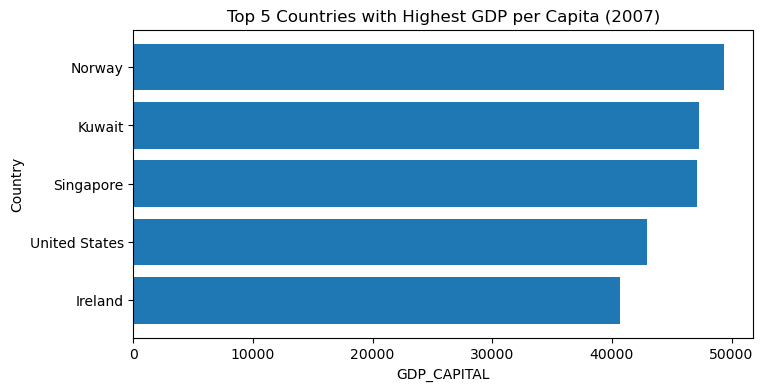

In [147]:
plt.figure(figsize=(8,4))
plt.barh('country','gdp_cap',data=highest_gdp)
plt.xlabel('GDP_CAPITAL')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest GDP per Capita (2007)')
plt.gca().invert_yaxis()

### Question-6) Find all country names that start with "I" and end with "a" using regex.

In [153]:
pattern=r'^I.*a$'
match_country_df=a[a['country'].str.match(pattern)]['country'].unique().tolist()
match_country_df

['India', 'Indonesia']

### Question-7) Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

In [155]:
average_gdp_2007=a[a['year']==2007].groupby('continent')['gdp_cap'].mean()
average_gdp_2007

continent
Africa       3089.032605
Americas    11003.031625
Asia        12473.026870
Europe      25054.481636
Oceania     29810.188275
Name: gdp_cap, dtype: float64

Text(0.5, 1.0, 'Distribution of GDP per Capita by Continent (2007)')

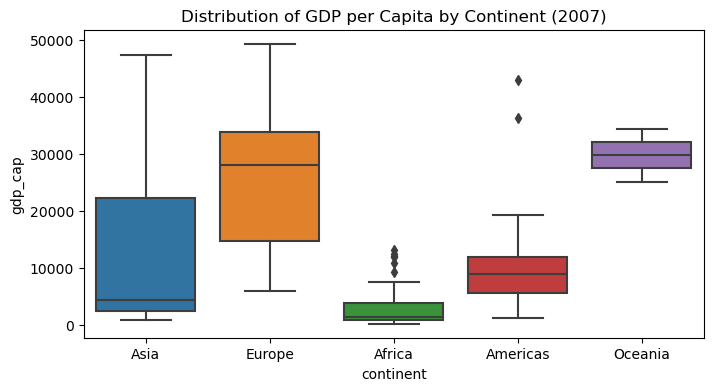

In [137]:
plt.figure(figsize=(8,4))
sns.boxplot(x='continent',y='gdp_cap',data=a[a['year']==2007])
plt.title('Distribution of GDP per Capita by Continent (2007)')

### Question-8) Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [61]:
life_exp_mean=a[a['year']==2007].groupby(['country','continent'])['life_exp'].mean()
result=life_exp_mean[life_exp_mean>=80]
result

country           continent
Australia         Oceania      81.235
Canada            Americas     80.653
France            Europe       80.657
Hong Kong, China  Asia         82.208
Iceland           Europe       81.757
Israel            Asia         80.745
Italy             Europe       80.546
Japan             Asia         82.603
New Zealand       Oceania      80.204
Norway            Europe       80.196
Spain             Europe       80.941
Sweden            Europe       80.884
Switzerland       Europe       81.701
Name: life_exp, dtype: float64

### Question-9) Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades
(e.g., the 1950s, 1960s).

In [168]:
a['decade']=(a['year']//10*10).astype(str)+'s'
a.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,decade
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low,1970s


### Queston-10) Compute the correlation matrix between GDP per capita, life expectancy,and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

Text(0.5, 1.0, 'correlation matrix between GDP per capita, life expectancy,and population')

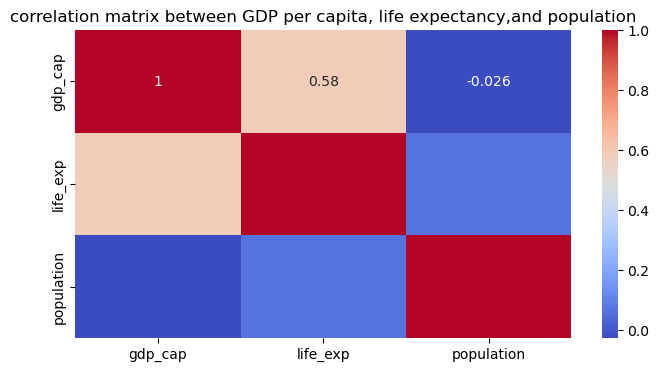

In [170]:
corr_mat=a[['gdp_cap','life_exp','population']].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title('correlation matrix between GDP per capita, life expectancy,and population')

### Question-11) How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

Text(0.5, 1.0, 'average life expectancy changed from 1952 to 2007')

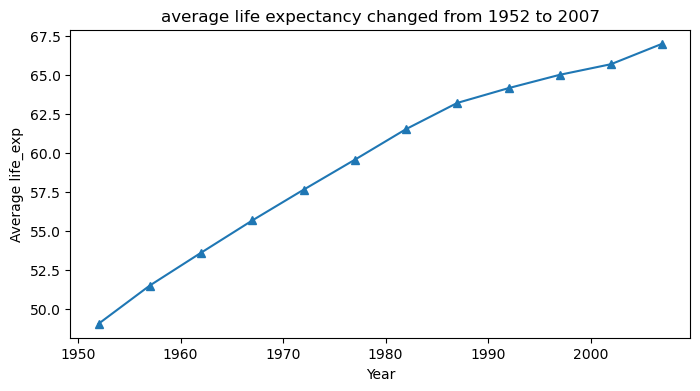

In [174]:
global_life=a.groupby('year')['life_exp'].mean()
plt.figure(figsize=(8,4))
plt.plot(global_life.index,global_life.values,marker='^')
plt.xlabel('Year')
plt.ylabel('Average life_exp')
plt.title('average life expectancy changed from 1952 to 2007')

# Subjective Question:
### Discuss the various reasons that could have contributed to the change.

Text(0, 0.5, 'Avg_gdp')

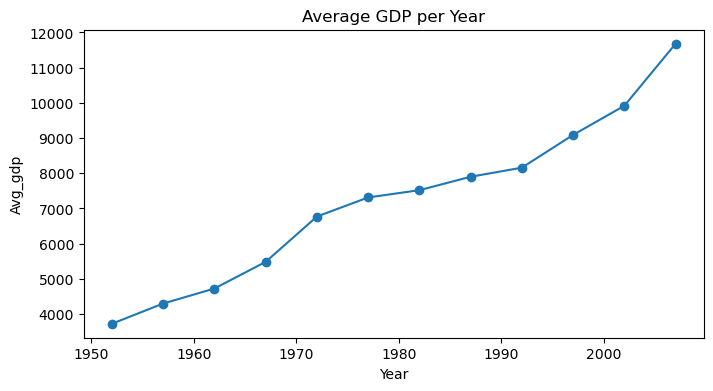

In [221]:
avg=a.groupby('year')['gdp_cap'].mean()
plt.figure(figsize=(8,4))
plt.plot(avg.index,avg.values,marker='o')
plt.title('Average GDP per Year')
plt.xlabel('Year')
plt.ylabel('Avg_gdp')

##### AS WE CAN SEE THE AVERAGE WORLD GDP INCREASED OVER THE YEARS WHICH CAN BE THE REASON OF INCREASED AVERAGE LIFE EXPECTANCY

### Question-12) For the year 2007, analyze the relationship between life expectancy and GDP per capita. Is there a noticeable trend or correlation? Represent this using a scatter plot.

In [176]:
realtionship=a[a['year']==2007][['gdp_cap','life_exp']].corr()
realtionship

,gdp_cap,life_exp
gdp_cap,1.000000,0.678662
life_exp,0.678662,1.000000


In [180]:
trand=a[a['year']==2007][['year','gdp_cap','life_exp']]
trand.head()

,year,gdp_cap,life_exp
11,2007,974.580338,43.828
23,2007,5937.029526,76.423
35,2007,6223.367465,72.301
47,2007,4797.231267,42.731
59,2007,12779.379640,75.320


Text(0.5, 1.0, 'relationship between life expectancy and GDP per capita in 2007')

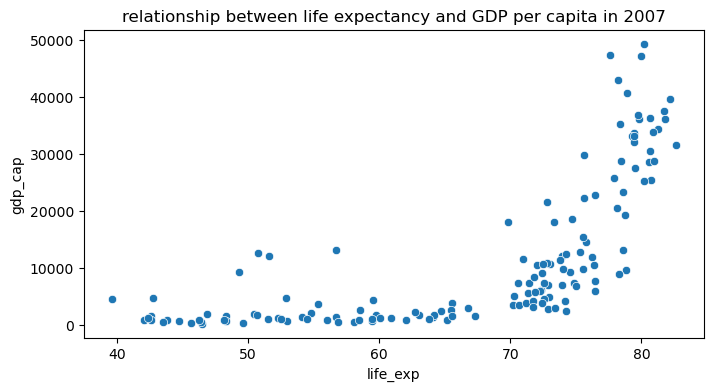

In [184]:
plt.figure(figsize=(8,4))
sns.scatterplot(y='gdp_cap',x='life_exp',data=trand)
plt.title('relationship between life expectancy and GDP per capita in 2007')

### Question-13) Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

In [209]:
avgerage_gdp=a[a['year']==2007].groupby('continent')['gdp_cap'].mean().reset_index()
avgerage_gdp

,continent,gdp_cap
0,Africa,3089.032605
1,Americas,11003.031625
2,Asia,12473.026870
3,Europe,25054.481636
4,Oceania,29810.188275


Text(0.5, 1.0, 'average GDP per capita for each continent in the year 2007.')

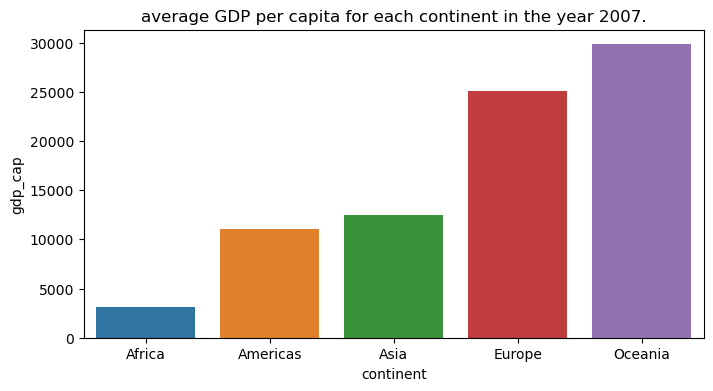

In [211]:
plt.figure(figsize=(8,4))
sns.barplot(x='continent',y='gdp_cap',data=avgerage_gdp)
plt.title('average GDP per capita for each continent in the year 2007.')

# SUBJECTIVE QUESTION
### Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?

In [223]:
#Total population of Oceania
a[a['continent']=='Oceania']['population'].sum()

212992136

In [225]:
#Total population of Americas
a[a['continent']=='Americas']['population'].sum()

7351438499

##### If any country have more population then the GDP of that country is low
##### Total population of Oceania(212992136) is less then the Americas(7351438499). Hence, GDP per Capita is higher for Oceania

### Question-14) Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.

#### (a) Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.

In [242]:
year=a[a['year']==2007]
two=year[year['country'].isin(['Afghanistan','Switzerland'])]
two[['life_exp','gdp_cap']]

,life_exp,gdp_cap
11,43.828,974.580338
1487,81.701,37506.419070


Text(0.5, 1.0, 'compare the life expectancy and country')

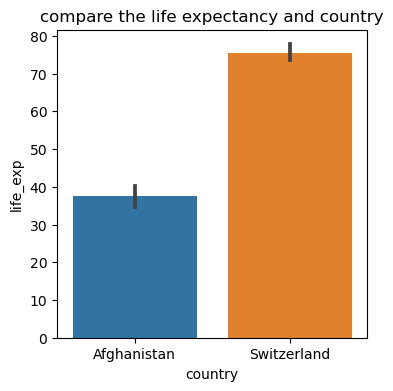

In [303]:
plt.figure(figsize=(4,4))
sns.barplot(y='life_exp',x='country',data=two)
plt.title('compare the life expectancy and country')

Text(0.5, 1.0, 'compare the country and GDP per capita')

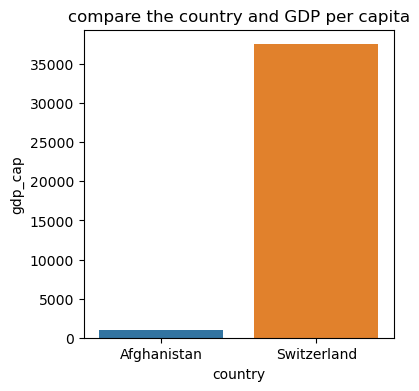

In [261]:
plt.figure(figsize=(4,4))
sns.barplot(y='gdp_cap',x='country',data=two)
plt.title('compare the country and GDP per capita')

### (b) Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

In [281]:
two=a[a['country'].isin(['Afghanistan','Switzerland'])]
two[['year','life_exp','gdp_cap']].head()     

,year,life_exp,gdp_cap
0,1952,28.801,779.445314
1,1957,30.332,820.853030
2,1962,31.997,853.100710
3,1967,34.020,836.197138
4,1972,36.088,739.981106


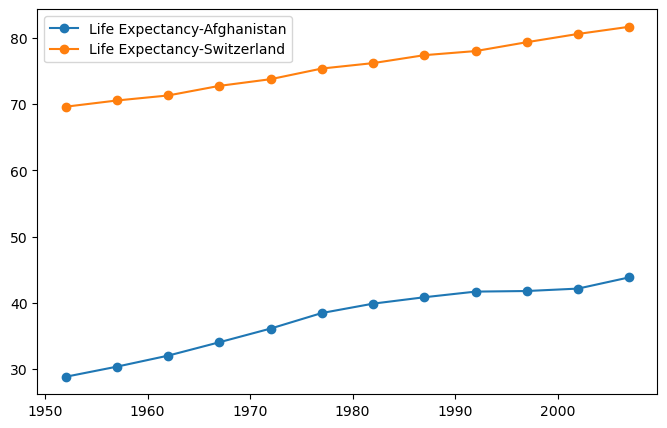

In [295]:
plt.figure(figsize=(8,5))
plt.plot('year','life_exp',data=two[two['country']=='Afghanistan'], label='Life Expectancy-Afghanistan',marker='o')
plt.plot('year','life_exp',data=two[two['country']=='Switzerland'], label='Life Expectancy-Switzerland',marker='o')
plt.legend(loc='upper left')

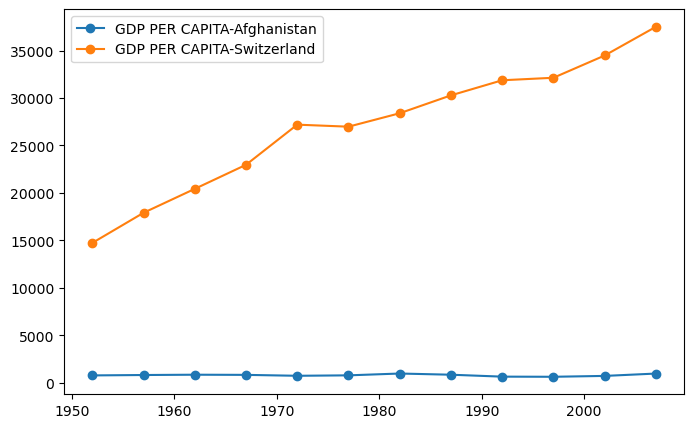

In [297]:
plt.figure(figsize=(8,5))
plt.plot('year','gdp_cap',data=two[two['country']=='Afghanistan'], label='GDP PER CAPITA-Afghanistan',marker='o')
plt.plot('year','gdp_cap',data=two[two['country']=='Switzerland'], label='GDP PER CAPITA-Switzerland',marker='o')
plt.legend(loc='upper left')

## Subjective Question:
### What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.

#### Answer- As per the above graphs for Switzerland and Afghanistan, its clear that if the country's GDP per Capita is high than the Life Expectancy will be higher. People tend to live longer in stable countries.
